# Global feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and plot a linegraph of the results across the ensemble. 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import Deltas_SW
from Fonctions import Deltas_LW

# Settings

In [3]:
ENSEMBLE = 'ENSEMBLE4_selection/'
path_official = '/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE_short = '/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

# Read files : radiative budget, tas

## Second PPE : amip and amip-future4K

In [4]:
path = path_official
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_amip

path = path_official
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
start_yr = 1979
drop = True
year_list = range(1982,2015,1)
official_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
official_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,246.033493,100.208107,340.698730,291.714813,340.698730,346.241608,-5.542877
1,246.036575,100.286873,340.691254,291.756744,340.691254,346.323456,-5.632202
2,246.216858,100.169746,340.688416,291.737305,340.688416,346.386597,-5.698181


In [5]:
path = path_PPE_short+'ENSEMBLE1/CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip_*.nc'
start_yr = 1979
drop = False
year_list = None
p1_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_amip

start_yr = 1951
path = path_PPE_short+'ENSEMBLE1/CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip-future4K_*.nc'
p1_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
p1_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,245.847061,99.844887,340.496674,291.295715,340.496674,345.691956,-5.195282
1,245.930023,100.026192,340.500641,291.433716,340.500641,345.956207,-5.455566
2,246.320786,99.984657,340.466858,291.496887,340.466858,346.305450,-5.838593
3,246.335007,99.894569,340.467224,291.325195,340.467224,346.229584,-5.762360
4,246.418381,99.600266,340.520782,291.306335,340.520782,346.018646,-5.497864


In [7]:
nb_p_list_LHS500 = ['p860', 'p861', 'p862', 'p864', 'p865', 'p866', 'p867', 'p868', 'p869', 
                    'p870', 'p871', 'p872', 'p873','p874', 'p875', 'p876', 'p877', 'p878', 'p879',
                    'p880', 'p881', 'p882', 'p883']
len(nb_p_list_LHS500)

23

In [8]:
path_PPE = path_PPE_short+ENSEMBLE

# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
N=len(nb_p_list_LHS500)
amip_LHS500={}
i = 0
for nb_p_LHS500 in nb_p_list_LHS500 :
    print(nb_p_LHS500)
    path=path_PPE+'CNRM-CM6-1_amip_PPE_ENSEMBLE4_selection/CNRM-CM6-1_amip_r1i1'+nb_p_LHS500+'f2/'
    filename = '*_CNRM-CM6-1_amip_r1i1'+nb_p_LHS500+'f2*.nc'
    amip_LHS500[str(nb_p_LHS500) + "_amip"] = get_wavg_budget_df(path, filename, variables, \
                                                                start_yr, drop, year_list)
    i=i+1
    

p860
p861
p862
p864
p865
p866
p867
p868
p869
p870
p871
p872
p873
p874
p875
p876
p877
p878
p879
p880
p881
p882
p883


In [9]:
# The amip experiments, new ensemble LHS500 : 

start_yr=1979
drop=False
year_list=None
N=len(nb_p_list_LHS500)
future4K_LHS500={}
i = 0
while i<N:
    nb_p_LHS500 = nb_p_list_LHS500[i]
    print(nb_p_LHS500)
    path=path_PPE+'CNRM-CM6-1_amip-future4K_PPE_ENSEMBLE4_selection/CNRM-CM6-1_amip-future4K_r1i1'+nb_p_LHS500+'f2/'
    filename = '*_CNRM-CM6-1_amip-future4K_r1i1'+nb_p_LHS500+'f2*.nc'
    future4K_LHS500[str(nb_p_LHS500) + "_future4K"] = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
    i=i+1

p860
p861
p862
p864
p865
p866
p867
p868
p869
p870
p871
p872
p873
p874
p875
p876
p877
p878
p879
p880
p881
p882
p883


## Create plot

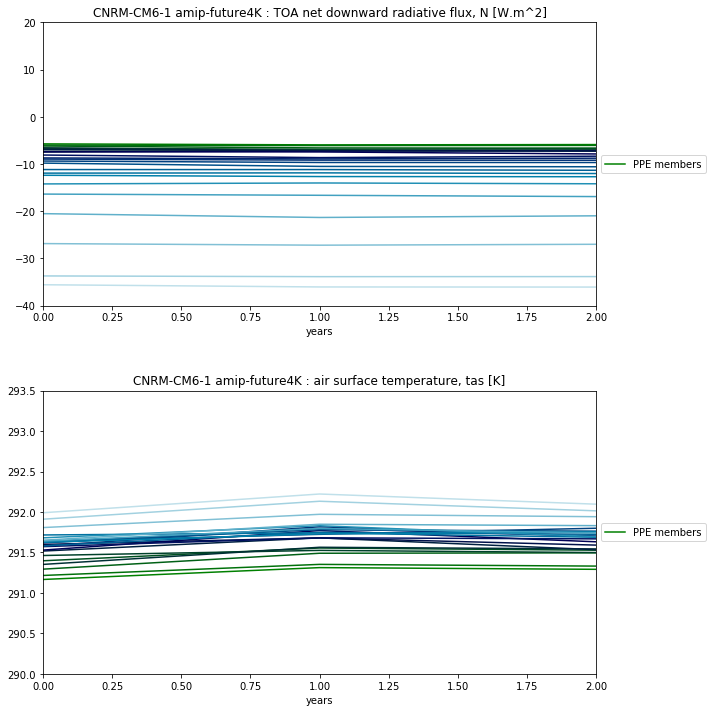

In [10]:
# PARAMETERS :
n=len(future4K_LHS500)
df=[None]*n
#df[0] = official_future4K
#df[1] = p1_future4K
df[:] = [future4K_LHS500[i+"_future4K"] for i in nb_p_list_LHS500]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, (len(future4K_LHS500)+2))]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip-future4K : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -40.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip-future4K : air surface temperature, tas [K]'
y = 'tas'
ymin = 290.0
ymax = 293.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_future4K.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

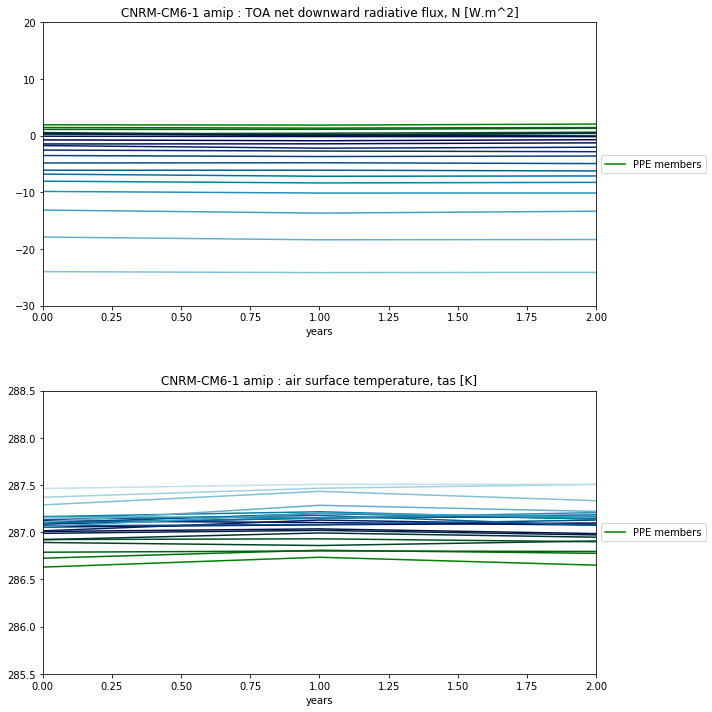

In [11]:
# PARAMETERS :
n=len(amip_LHS500)
df=[None]*n
#df[0] = official_amip
#df[1] = p1_amip
df[:] = [amip_LHS500[i+"_amip"] for i in nb_p_list_LHS500]
cmap1 = plt.get_cmap('ocean')
colors = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500)+2)]
linewidth = [1.5]
i=0
N=len(df)
while i<N:
    linewidth.append(1.5)
    i=i+1
    
xlabel = 'years'
xmin = 0
xmax = 2
legend = ['PPE members']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CNRM-CM6-1 amip : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -30.0
ymax = 20.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CNRM-CM6-1 amip : air surface temperature, tas [K]'
y = 'tas'
ymin = 285.5
ymax = 288.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas_amip.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

# Compute : Delta(TOA), Delta(tas), Lambda

In [12]:
official_amip

,rlut,rsut,rsdt,tas,F,H,N
0,238.267899,101.744835,340.698730,286.938538,340.698730,340.012726,0.686005
1,238.770569,101.704056,340.691254,287.068726,340.691254,340.474609,0.216644
2,238.196167,101.862389,340.688416,286.955109,340.688416,340.058563,0.629852


In [13]:
result = pd.DataFrame()
df_CTL = official_amip
df = official_future4K
expe_name = 'official_future4K'
n = len(df_CTL)
official_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
official_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
official_result_LW

,Delta_LW_official_future4K,Delta_tas_official_future4K,Lambda_LW_official_future4K
0,7.765594,4.776276,1.625868
1,7.515800,4.732147,1.588243
2,7.684097,4.748830,1.618103


In [14]:
result = pd.DataFrame()
df_CTL = p1_amip
df = p1_future4K
expe_name = 'p1_future4K'
n = len(df_CTL)
p1_result = Deltas_Lambda(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_SW = Deltas_SW(result, df_CTL, df, expe_name, n)

result = pd.DataFrame()
p1_result_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
p1_result_LW

,Delta_LW_p1_future4K,Delta_tas_p1_future4K,Lambda_LW_p1_future4K
0,7.563141,4.375641,1.728465
1,7.624748,4.408966,1.729373
2,7.757507,4.479523,1.731771
3,7.834129,4.450424,1.760311
4,7.894696,4.420733,1.785834


In [16]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)
result= pd.DataFrame()

n = len(amip_LHS500["p860_amip"])

for j in nb_p_list_LHS500:
    df_CTL = amip_LHS500[j+"_amip"]
    df = future4K_LHS500[j+"_future4K"]
    expe_name=str(j+"_future4k")
       
    Lambda = Deltas_Lambda(result, df_CTL, df, expe_name, n)
    Lambda_SW = Deltas_SW(result, df_CTL, df, expe_name, n)
    Lambda_LW = Deltas_LW(result, df_CTL, df, expe_name, n)
    
#Lambda = Lambda[:-1]
#Lambda_SW = Lambda_SW[:-1] # drop last n rows, because 2 years only future4K
#Lambda_LW = Lambda_LW[:-1]

Lambda

,Delta_N_p860_future4k,Delta_tas_p860_future4k,Lambda_p860_future4k,Delta_SW_p860_future4k,Lambda_SW_p860_future4k,Delta_LW_p860_future4k,Lambda_LW_p860_future4k,Delta_N_p861_future4k,Delta_tas_p861_future4k,Lambda_p861_future4k,...,Lambda_SW_p882_future4k,Delta_LW_p882_future4k,Lambda_LW_p882_future4k,Delta_N_p883_future4k,Delta_tas_p883_future4k,Lambda_p883_future4k,Delta_SW_p883_future4k,Lambda_SW_p883_future4k,Delta_LW_p883_future4k,Lambda_LW_p883_future4k
0,-7.661285,4.535522,-1.689174,-2.004845,-0.442032,9.666107,2.131200,-7.431641,4.490570,-1.654944,...,-1.505248,10.313354,2.271492,-3.140137,4.527740,-0.693533,-6.942612,-1.533350,10.082733,2.226880
1,-7.813141,4.556564,-1.706818,-2.048309,-0.449529,9.785515,2.147564,-7.441528,4.516983,-1.637878,...,-1.562863,10.376953,2.254092,-3.062744,4.621216,-0.649617,-7.226952,-1.563864,10.328400,2.234996
2,-7.932861,4.584534,-1.709494,-2.121608,-0.462775,9.924022,2.164674,-7.501953,4.529643,-1.646985,...,-1.530924,10.178772,2.226466,-3.142670,4.610453,-0.684837,-7.207163,-1.563222,10.322357,2.238903


## To store feedbacks and Delta T values in numpy arrays

In [17]:
official_NetFdbck = official_result['Lambda_official_future4K'].mean()
official_SW = official_result_SW['Lambda_SW_official_future4K'].mean()
official_LW = official_result_LW['Lambda_LW_official_future4K'].mean()

p1_NetFbck = p1_result['Lambda_p1_future4K'].mean()
p1_SW = p1_result_SW['Lambda_SW_p1_future4K'].mean()
p1_LW = p1_result_LW['Lambda_LW_p1_future4K'].mean()

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/Net_feedbacks_official.npy', official_NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/SW_feedbacks_official.npy', official_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/LW_feedbacks_official.npy', official_LW)

np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/Net_feedbacks_p1.npy', p1_NetFbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/SW_feedbacks_p1.npy', p1_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/LW_feedbacks_p1.npy', p1_LW)

In [18]:
N2=len(nb_p_list_LHS500) 
NetFdbck = [1]*(N2)
Fdbck_SW = [1]*(N2)
Fdbck_LW = [1]*(N2)
i=0
while i<N2:
    nb_p = nb_p_list_LHS500[i]
    #print(nb_p)
    NetFdbck[i] = Lambda['Lambda_'+str(nb_p)+'_future4k'].mean()
    Fdbck_SW[i] = Lambda_SW['Lambda_SW_'+str(nb_p)+'_future4k'].mean()
    Fdbck_LW[i] = Lambda_LW['Lambda_LW_'+str(nb_p)+'_future4k'].mean()
    i=(i+1)

NetFdbck

[-1.7018287181854248,
 -1.6466021140416462,
 -1.6506785949071248,
 -1.5731408596038818,
 -1.6048049926757812,
 -1.5946045716603596,
 -1.584927995999654,
 -1.5537654956181843,
 -1.4853468736012776,
 -1.5356155633926392,
 -1.4691840807596843,
 -1.4072593450546265,
 -1.308760126431783,
 -1.1785019636154175,
 -1.1175294319788616,
 -1.077129324277242,
 -0.9657924969991049,
 -0.9024846951166788,
 -0.7098463575045267,
 -0.5988670190175375,
 -0.6410051385561625,
 -0.6962807377179464,
 -0.6759957869847616]

In [19]:
# List nouvel ensemble LHS500

N2=len(nb_p_list_LHS500)
DeltaT_global_mean = [1]*(N2)

j=0
while j<N2:
    nb_p = nb_p_list_LHS500[j]
    #print(nb_p)
    DeltaT_global_mean[j] = result['Delta_tas_'+str(nb_p)+'_future4k'].mean()
    j=(j+1)
    
#DeltaT_global_mean

In [20]:
# Save the numpy array in a file
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/DeltaT_global_mean.npy', DeltaT_global_mean)

# Create plot

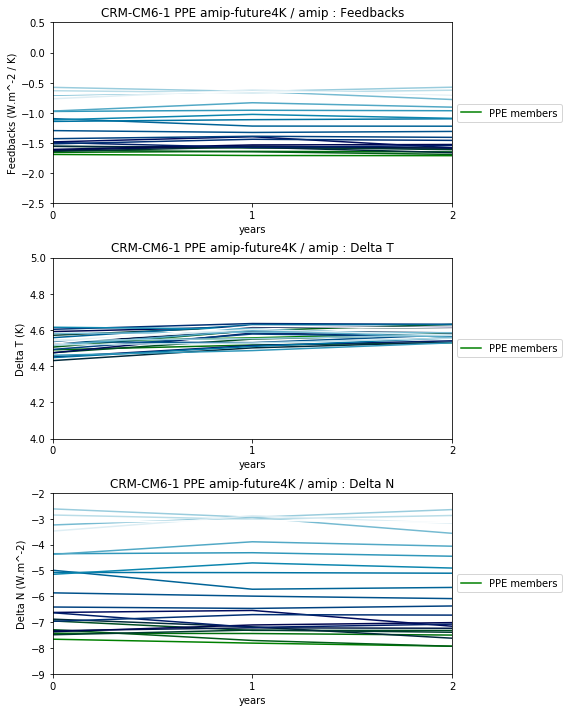

In [21]:
# PARAMETERS
df = result
cmap1 = plt.get_cmap('ocean')
xlabel='years'
xmin = 0
xmax = 2
legend=['PPE members']
linewidth = [1.5]

N=len(amip_LHS500)+1
j=0
while j<N:
    linewidth.append(1.5)
    j=j+1
#--------------------------- Plot result : future4K --------------------------------------
plt.subplots(figsize=(8,10))

#########################
plt.subplot(311)
title="CRM-CM6-1 PPE amip-future4K / amip : Feedbacks"
ymin = -2.5
ymax = 0.5

n=len(amip_LHS500)
colors = [cmap1(0)]*(n+len(amip_LHS500))
y=[None]*N
y[:] = ['Lambda_'+j+'_future4k' for j in nb_p_list_LHS500]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Feedbacks (W.m^-2 / K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(312)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta T'
ymin = 4.0
ymax = 5.0


y[:] = ['Delta_tas_'+i+'_future4k' for i in nb_p_list_LHS500]
colors[:] = [cmap1(j) for j in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta T (K)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#########################
plt.subplot(313)
title='CRM-CM6-1 PPE amip-future4K / amip : Delta N'
ymin = -9.0
ymax = -2.0

y[:] = ['Delta_N_'+i+'_future4k' for i in nb_p_list_LHS500]
colors[:] = [cmap1(i) for i in np.linspace(0, 1, len(amip_LHS500))]

plotlines_1df(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)
plt.ylabel('Delta N (W.m^-2)')
plt.xlim(0, 2)
plt.xticks([0, 1, 2])

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/PPE_feedbacks_DT_DN.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

In [22]:
# Data from Rostron et al. (2020)
Fdbck_min_UK = -1.8
Fdbck_max_UK = -0.93

# Default model feedbacks
p1_feedbacks = np.load('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/Net_feedbacks_p1.npy')

In [23]:
NetFdbck

[-1.7018287181854248,
 -1.6466021140416462,
 -1.6506785949071248,
 -1.5731408596038818,
 -1.6048049926757812,
 -1.5946045716603596,
 -1.584927995999654,
 -1.5537654956181843,
 -1.4853468736012776,
 -1.5356155633926392,
 -1.4691840807596843,
 -1.4072593450546265,
 -1.308760126431783,
 -1.1785019636154175,
 -1.1175294319788616,
 -1.077129324277242,
 -0.9657924969991049,
 -0.9024846951166788,
 -0.7098463575045267,
 -0.5988670190175375,
 -0.6410051385561625,
 -0.6962807377179464,
 -0.6759957869847616]

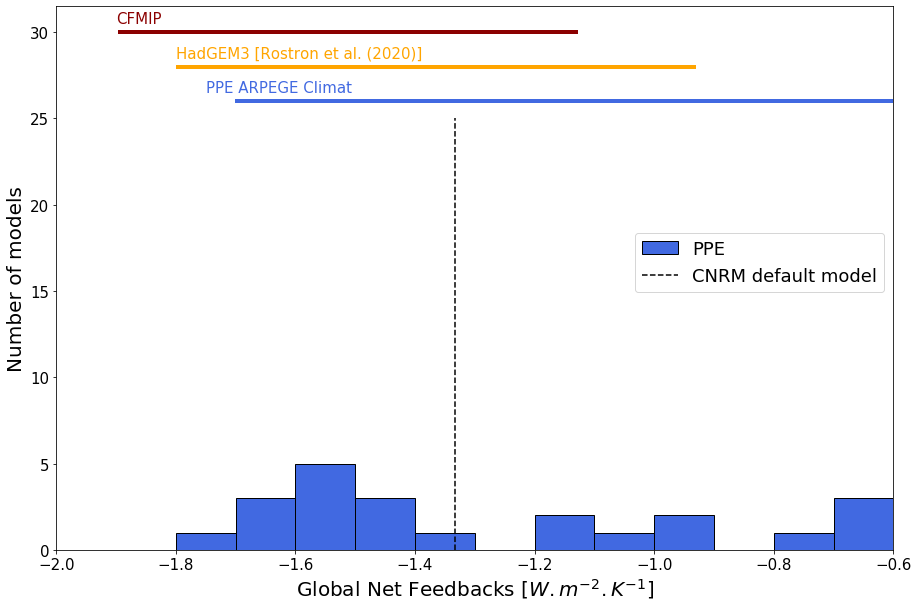

In [24]:
CMIP6 = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/CMIP6_NetFeedbcks.npy") 
emulated = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/emulated_NetFdbck.npy")

# Create plot of PDF of net feedbacks emulated by neural network 

Bins = [-2.6,-2.5,-2.4, -2.3,-2.2,-2.0,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5, -0.4,-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3]
new_Bins = [-2.6,-2.5,-2.4, -2.3,-2.2,-2.0,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5, -0.4,-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3]

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.distplot(NetFdbck, norm_hist= False, bins = Bins, kde = False, 
                  hist_kws={"alpha": 1.0, "color" : 'royalblue', "edgecolor" : "black"}, label = 'PPE', ax=ax)
#ax = sns.distplot(CMIP6, norm_hist=False, bins = new_Bins, kde = False,
#                  hist_kws={"alpha": 1.0, "color" : 'darkred', "edgecolor" : "black"}, label= 'CFMIP6', ax=ax)
#ax = sns.distplot(emulated, norm_hist=False, kde = False, 
#                 hist_kws={"alpha": 0.2, "color" : 'darkred'}, label= 'random forest', ax=ax)

plt.vlines(p1_feedbacks,ymin = 0,ymax = 25,label='CNRM default model', colors='black', 
           linestyles='dashed')

plt.hlines(30.0,xmin = CMIP6.min(),xmax = CMIP6.max(),
           colors='darkred', linewidth=4.0, linestyles='solid')
plt.text(-1.9, 30.5, 'CFMIP', color = 'darkred', fontsize=15)

plt.hlines(28.0,xmin = Fdbck_min_UK,xmax = Fdbck_max_UK,
           colors='orange', linewidth=4.0, linestyles='solid')
plt.text(-1.8, 28.5, 'HadGEM3 [Rostron et al. (2020)] ', color = 'orange', fontsize=15)

plt.hlines(26.0,xmin = min(NetFdbck),xmax = max(NetFdbck),
           colors='royalblue', linewidth=4.0, linestyles='solid')
plt.text(-1.75, 26.5, 'PPE ARPEGE Climat', color = 'royalblue', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18, bbox_to_anchor=(0,0,1,0.6))
#plt.title(title, fontsize = 22)
plt.xlabel('Global Net Feedbacks [$W.m^{-2}.K^{-1}$]',fontsize=20)
plt.ylabel('Number of models',fontsize=20)
plt.xlim(-2.0, -0.6)
#plt.ylim(0,5)

# Enregistrer la figure ...........

#plt.savefig("/data/home/globc/peatier/figures/PDF_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

In [25]:
# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/SIX_Net_feedbacks.npy', NetFdbck)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/SIX_SW_feedbacks.npy', Fdbck_SW)
np.save('/data/home/globc/peatier/CNRMppe/PPE/'+ENSEMBLE+'files/npy/SIX_LW_feedbacks.npy', Fdbck_LW)